### This EDA might be helpful for consumers looking to make their purchase decision on Electric Vehicles by giving an overview of the specifications like range, efficiency, price etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Assign csv to pandas dataframe
df = pd.read_csv('ElectricCarData_Norm.csv')

In [4]:
# Explore the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [5]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [6]:
df['RapidCharge'].unique()

array(['Rapid charging possible', 'Rapid charging not possible'],
      dtype=object)

In [7]:
# 1 - Populate numeric column fields
# 2 - RapidCharge to Yes/No
# 3 - PowerTrain in short form
# 4 - Group table/ Partition by brand
# 5 - Brand per Model

In [8]:
# 1 - Extract only digits from strings in columns
df['Accel'] = df['Accel'].str.extract(r'(\d+.)').astype(float)
df['TopSpeed'] = df['TopSpeed'].str.extract(r'(\d+)').astype(int)
df['Range'] = df['Range'].str.extract(r'(\d+)').astype(int)
df['Efficiency'] = df['Efficiency'].str.extract(r'(\d+)').astype(int)
df['FastCharge'] = df['FastCharge'].str.extract(r'(\d+)').astype(float) #contains nan 

In [9]:
# 2 - RapidCharge to Yes/No
df['RapidCharge'] = df['RapidCharge'].apply(lambda x: 'Yes' if 'Rapid charging possible' in x else 'No')

# Create dictionary 
df['PowerTrain'] = df['PowerTrain'].replace(
    {'All Wheel Drive' : 'AWD',
     'Rear Wheel Drive' : 'RWD',
     'Front Wheel Drive' : 'FWD'}
)

In [10]:
# Create dictionary for new column names
column_dict = {
    'Accel' : 'Acceleration_s',
    'TopSpeed' : 'TopSpeed_km/h',
    'Range' : 'Range_km',
    'Efficiency' : 'Efficiency_Wh/km',
    'FastCharge' : 'FastCharge_km/h'
}

# Rename columns according to column dict
df.rename(columns = column_dict, inplace=True)

In [11]:
# Drop similar row
df.drop(92, inplace=True)

In [12]:
df2 = df.drop(['Seats', 'PlugType', 'BodyStyle', 'Segment'], axis=1)

In [13]:
# View dataframe grouped by Brand and Model. Since each model are unique, max() returns every model of the EV in this dataset
df.groupby(['Brand','Model']).max()

Acceleration_s  TopSpeed_km/h  \
Brand       Model                                                            
Aiways      U5                                          9.0            150   
Audi        Q4 Sportback e-tron                         6.0            180   
            Q4 e-tron                                   6.0            180   
            e-tron 50 quattro                           6.0            190   
            e-tron 55 quattro                           5.0            200   
            e-tron GT                                   3.0            240   
            e-tron S 55 quattro                         4.0            210   
            e-tron S Sportback 55 quattro               4.0            210   
            e-tron Sportback 50 quattro                 6.0            190   
            e-tron Sportback 55 quattro                 5.0            200   
BMW         i3 120 Ah                                   7.0            150   
            i3s 120 Ah                                  6.0            160   
            i4                                          4.0            200   
            iX3                                         6.0            180   
Byton       M-Byte 72 kWh 2WD                           7.0            190   
            M-Byte 95 kWh 2WD                           7.0            190   
            M-Byte 95 kWh 4WD                           5.0            190   
CUPRA       el-Born                                     6.0            160   
Citroen     e-C4                                        9.0            150   
DS          3 Crossback E-Tense                         8.0            150   
Fiat        500e Convertible                            9.0            150   
            500e Hatchback                              9.0            150   
Ford        Mustang Mach-E ER AWD                       6.0            180   
            Mustang Mach-E ER RWD                       7.0            180   
            Mustang Mach-E SR AWD                       6.0            180   
            Mustang Mach-E SR RWD                       6.0            180   
Honda       e                                           9.0            145   
            e Advance                                   8.0            145   
Hyundai     IONIQ Electric                              9.0            165   
            Kona Electric 39 kWh                        9.0            155   
            Kona Electric 64 kWh                        7.0            167   
Jaguar      I-Pace                                      4.0            200   
Kia         e-Niro 39 kWh                               9.0            155   
            e-Niro 64 kWh                               7.0            167   
            e-Soul 39 kWh                               9.0            157   
            e-Soul 64 kWh                               7.0            167   
Lexus       UX 300e                                     7.0            160   
Lightyear   One                                        10.0            150   
Lucid       Air                                         2.0            250   
MG          ZS EV                                       8.0            140   
Mazda       MX-30                                       9.0            150   
Mercedes    EQA                                         5.0            200   
            EQC 400 4MATIC                              5.0            180   
            EQV 300 Long                               10.0            140   
Mini        Cooper SE                                   7.0            150   
Nissan      Ariya 63kWh                                 7.0            160   
            Ariya 87kWh                                 7.0            160   
            Ariya e-4ORCE 63kWh                         5.0            200   
            Ariya e-4ORCE 87kWh                         5.0            200   
            Ariya e-4ORCE 87kWh Performance             5.0        

In [46]:
# Generate descriptive statistics as a reference for analysis
df.describe()

,Acceleration_s,TopSpeed_km/h,Range_km,Efficiency_Wh/km,FastCharge_km/h,Seats,PriceEuro
count,102.000000,102.000000,102.000000,102.000000,97.000000,102.000000,102.000000
mean,6.960784,179.313725,338.529412,189.303922,458.144330,4.882353,55997.588235
std,3.050472,43.771228,126.609613,29.679072,201.821548,0.799680,34250.724403
min,2.000000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.000000,150.000000,250.000000,168.000000,270.000000,5.000000,34414.750000
50%,7.000000,160.000000,340.000000,180.500000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,204.500000,560.000000,5.000000,65000.000000
max,22.000000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


In [45]:
#Sorting each columns in descending order for visualization
topspd_df = df.loc[:, ['Brand','Model', 'TopSpeed_km/h']].sort_values(by='TopSpeed_km/h', ascending=False)
range_df = df.loc[:, ['Brand','Model', 'Range_km']].sort_values(by='Range_km', ascending=False)
eff_df = df.loc[:, ['Brand','Model', 'Efficiency_Wh/km']].sort_values(by='Efficiency_Wh/km', ascending=False)
price_df = df.loc[:, ['Brand','Model', 'PriceEuro']].sort_values(by='PriceEuro', ascending=False)

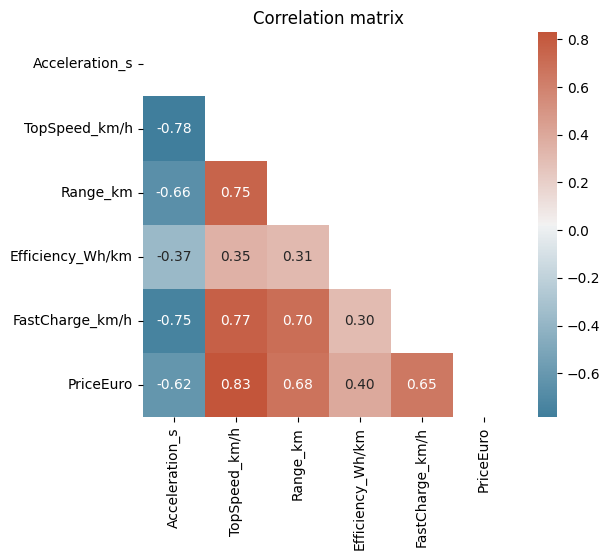

In [47]:
# Plot correlation matrix
ax = plt.figure(figsize=(6,5))
corr = df2.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, fmt='.2f');
plt.title('Correlation matrix');

<Figure size 1000x500 with 0 Axes>

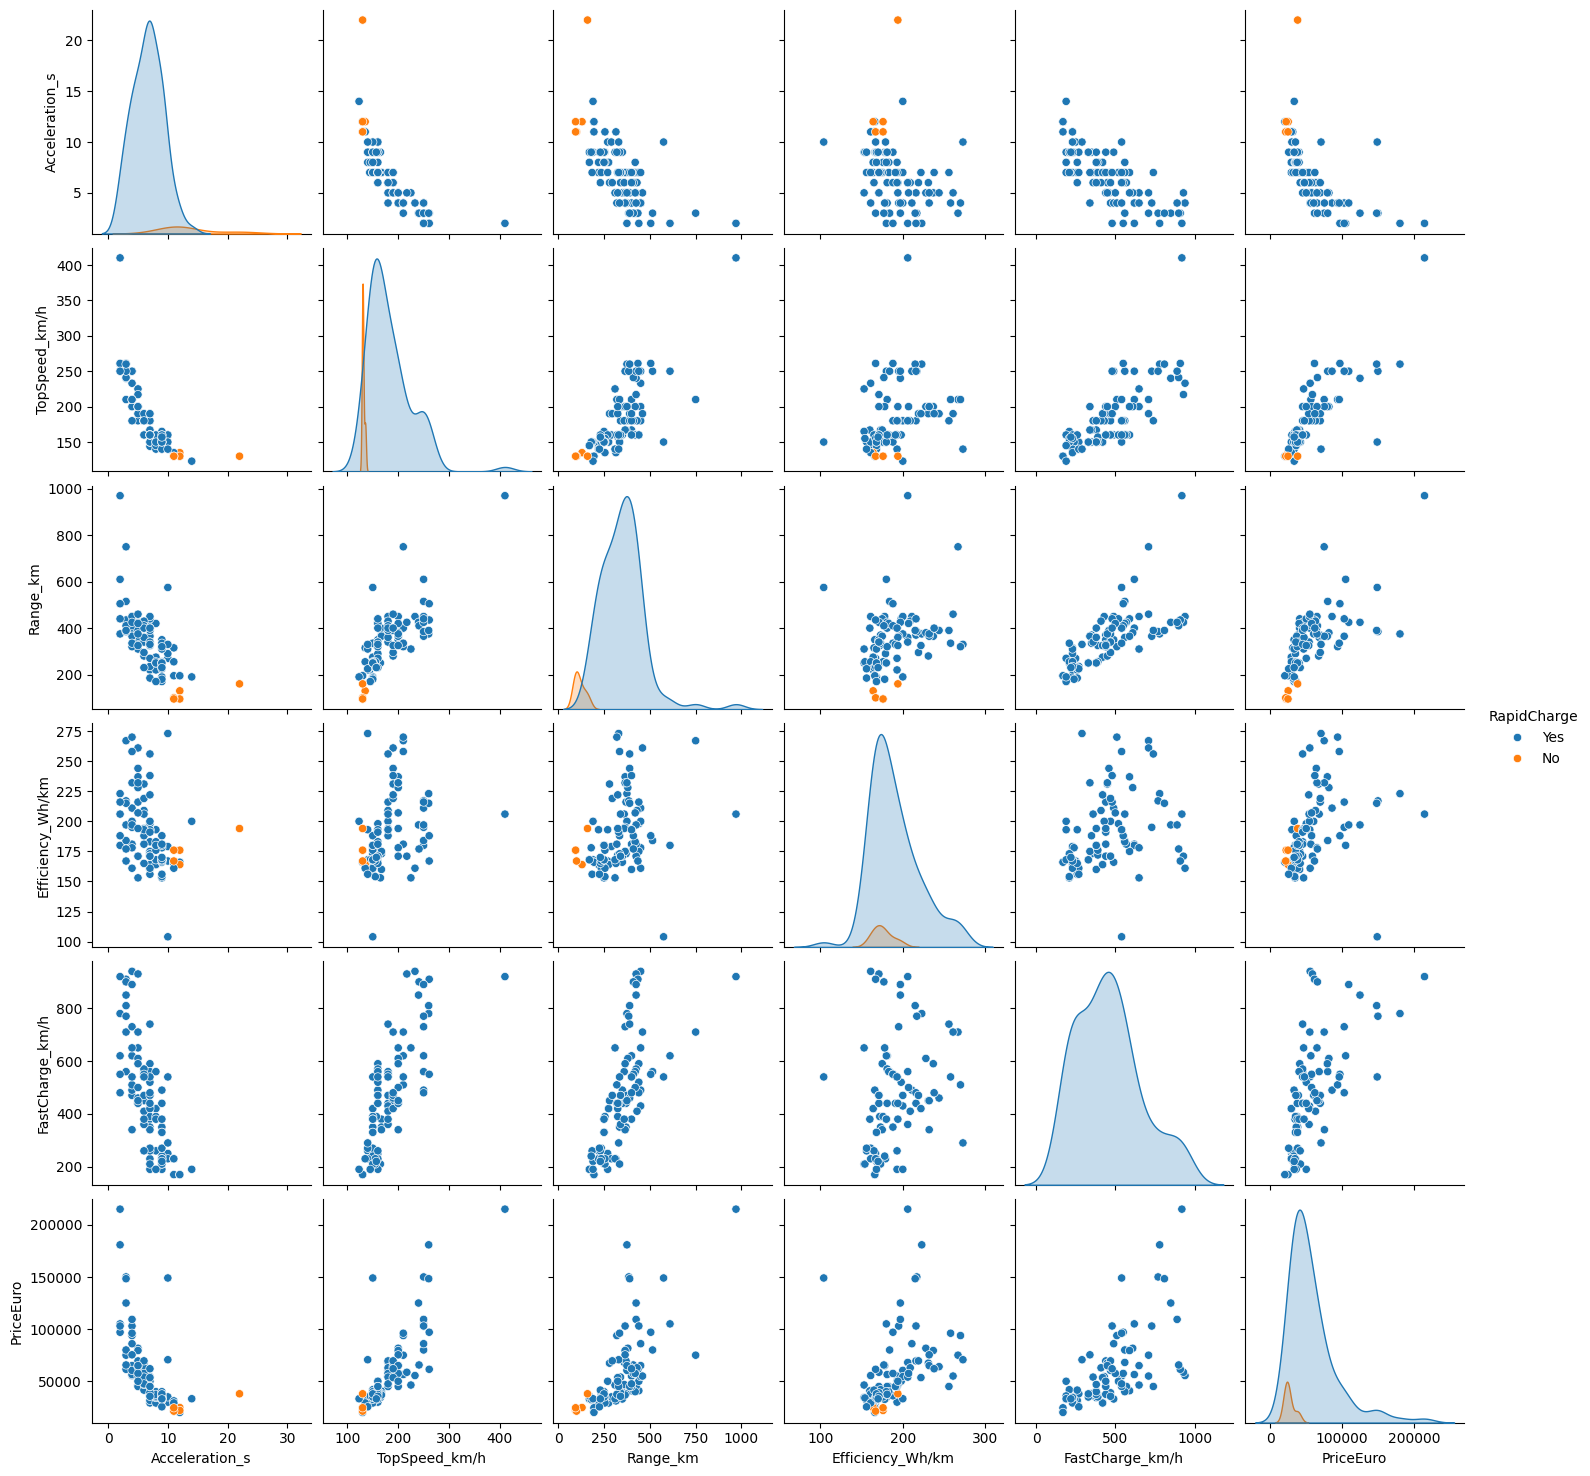

In [43]:
ax = plt.figure(figsize=(10,5))
sns.pairplot(df2, hue = 'RapidCharge');

#### The pairplot suggests that vehicles with no rapid charge possess lower end of the specs, which translates to lower cost

In [224]:
# Top 10 brands that offers most models
models_df = df.loc[:,'Brand'].value_counts().reset_index()[:10]

In [225]:
models_df

,Brand,count
0,Tesla,13
1,Audi,9
2,Nissan,8
3,Volkswagen,8
4,Skoda,6
5,Renault,5
6,Porsche,5
7,BMW,4
8,Ford,4
9,Kia,4


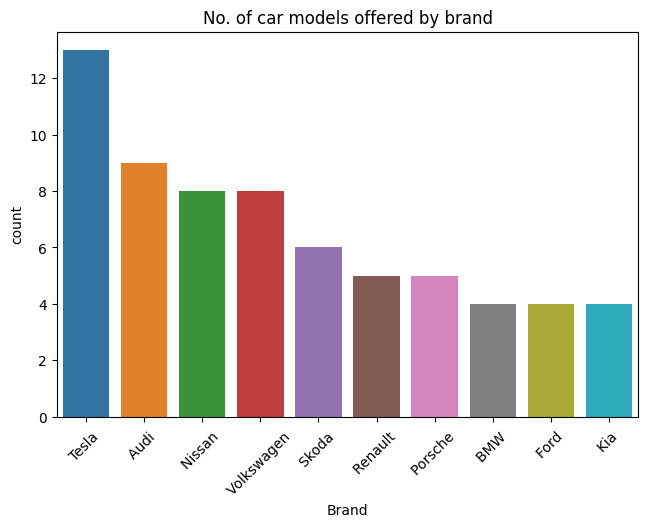

In [226]:
ax = plt.figure(figsize=(7.5,5))
sns.barplot(data=models_df, x='Brand', y='count', hue='Brand');
plt.xticks(rotation=45);
plt.title('No. of car models offered by brand');

#### 4 major automakers that offers at least 8 models and above are Tesla, Audi, Nissan, and Volkswagen

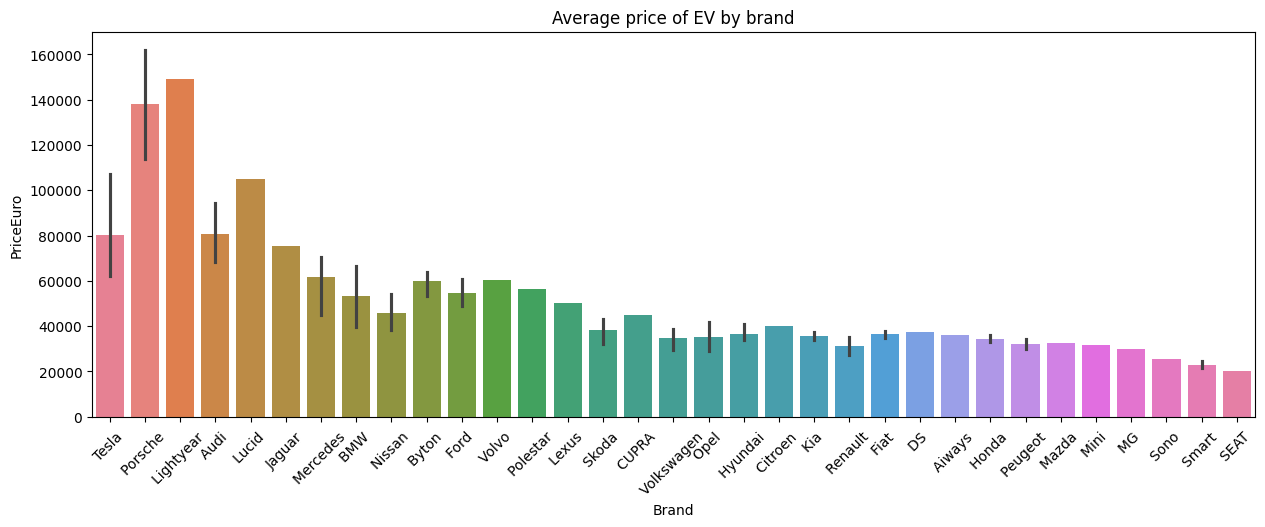

In [210]:
# Price group of electric vehicles by brand
ax = plt.figure(figsize=(15,5))
sns.barplot(data=price_df, x='Brand', y='PriceEuro', hue='Brand');
plt.xticks(rotation=45);
plt.title('Average price of EV by brand');

#### An average EV costs about €56,000， with Tesla being slightly above the average price while having the most model variants

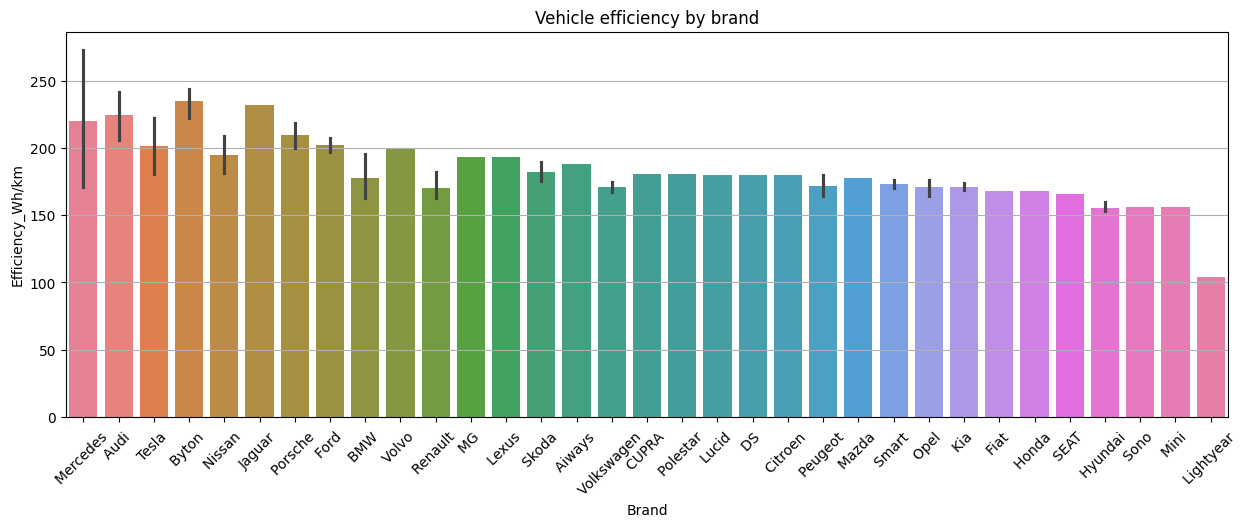

In [183]:
# Efficiency of vehicles by brand
ax = plt.figure(figsize=(15,5))
sns.barplot(data=eff_df, x='Brand', y='Efficiency_Wh/km', hue='Brand');
plt.grid(axis='y')
plt.xticks(rotation=45);
plt.title('Vehicle efficiency by brand');

#### Most EVs have efficiency of about 190 Wh/km. Mercedes, Audi, and Tesla vehicles offers good range by the battery pack size

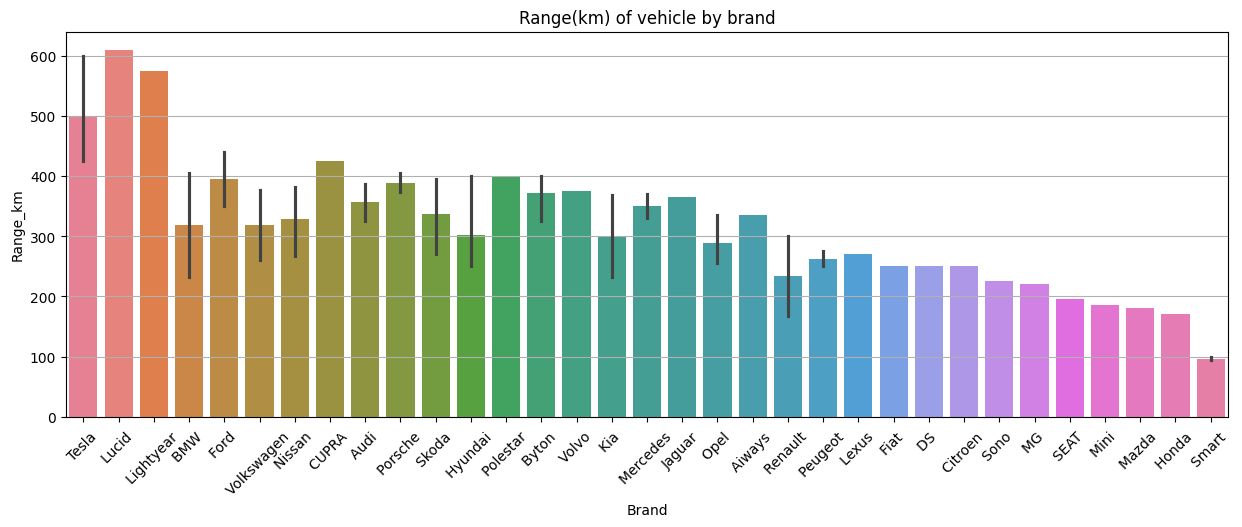

In [184]:
ax = plt.figure(figsize=(15,5))
sns.barplot(data=range_df, x='Brand', y='Range_km', hue='Brand');
plt.grid(axis='y')
plt.xticks(rotation=45);
plt.title('Range(km) of vehicle by brand');

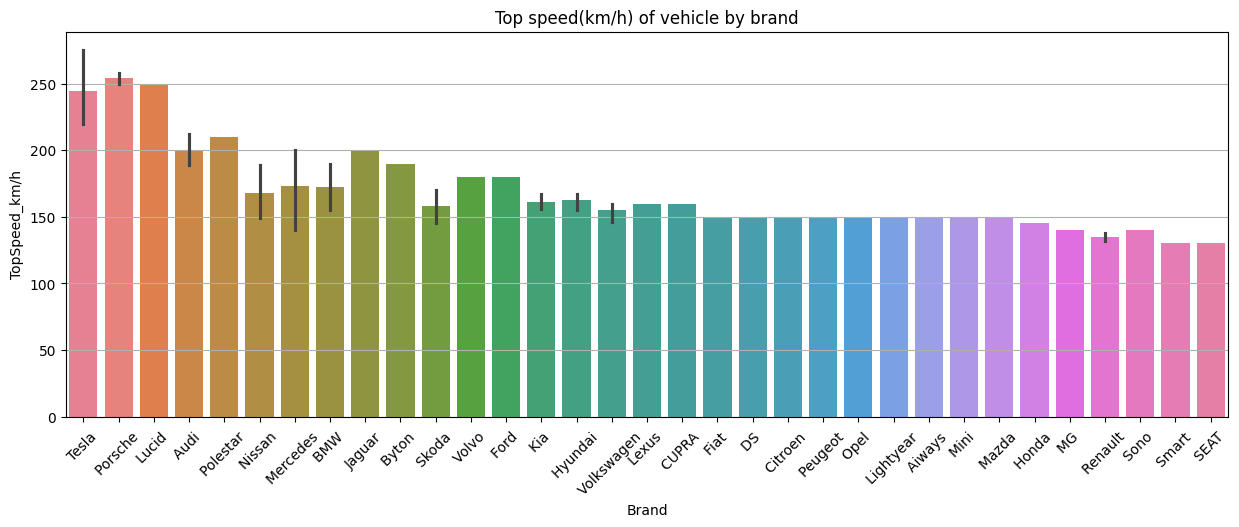

In [48]:
ax = plt.figure(figsize=(15,5))
sns.barplot(data=topspd_df, x='Brand', y='TopSpeed_km/h', hue='Brand');
plt.grid(axis='y')
plt.xticks(rotation=45);
plt.title('Top speed(km/h) of vehicle by brand');

In [39]:
plugtype_df = df['PlugType'].value_counts()

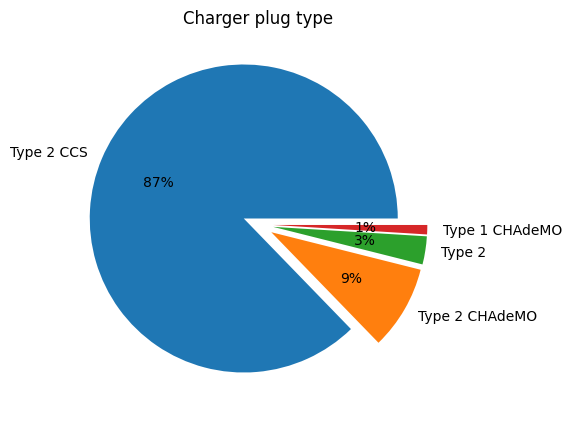

In [41]:
ax = plt.figure(figsize=(10,5))
plt.pie(
    plugtype_df, labels = df['PlugType'].unique(), 
    autopct='%.0f%%',
    explode=(.1,.1,.1,.1)
);
plt.title('Charger plug type');

#### Most EVs in Europe adopt Type 2 CCS charging port

## Conclusion:

#### Tesla appears to be most versatile among all, offering vehicles at different prices points and specs. Big automakers like Mercedes, Volvo, Ford are also able to offer vehicles of average specs at a reasonable price point.